# 第三章 分布数据集的可视化

在处理一组数据时，通常首先要做的是了解变量是如何分布的。这一章将简要介绍seborn中用于检查单变量和双变量分布的一些工具。你可能还想看看分类变量的章节，来看看函数的例子，这些函数让我们很容易比较变量的分布。

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from scipy import stats, integrate
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(color_codes=True)

np.random.seed(sum(map(ord, "distributions")))

## 单变量分布

最方便的方式是快速查看单变量分布无疑是使用distplot()函数。默认情况下，这将绘制一个直方图，并拟合出核密度估计(KDE)。

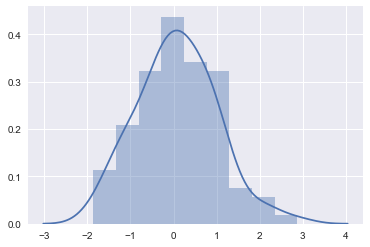

In [2]:
x = np.random.normal(size=100)
sns.distplot(x)

## 直方图

直方图应当是非常熟悉的函数了，在matplotlib中就存在hist函数。直方图通过在数据的范围内切成数据片段，然后绘制每个数据片段中的观察次数，来表示整体数据的分布。

为了说明这一点，我们删除密度曲线并添加了地毯图，每个观察点绘制一个小的垂直刻度。您可以使用rugplot()函数来制作地毯图，但它也可以在distplot()中使用：

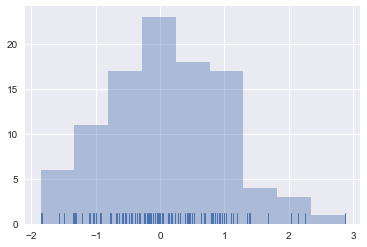

In [3]:
sns.distplot(x, kde=False, rug=True);

绘制KDE比绘制直方图更有计算性。所发生的是，每一个观察都被一个以这个值为中心的正态（ 高斯）曲线所取代。

绘制直方图时，主要的选择是使用切分数据片段的数量或在何位置切分数据片段。 distplot()使用一个简单的规则来很好地猜测并给予默认的切分数量，但尝试更多或更少的数据片段可能会显示出数据中的其他特征：

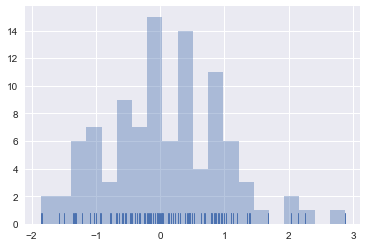

In [8]:
sns.distplot(x, bins=20, kde=False, rug=True)    #bins设置矩形图数量

## 核密度估计(KDE) Kernel density estimaton

或许你对核密度估计可能不像直方图那么熟悉，但它是绘制分布形状的有力工具。如同直方图一样，KDE图会对一个轴上的另一轴的高度的观测密度进行描述：
绘制KDE比绘制直方图更有计算性。所发生的是，每一个观察都被一个以这个值为中心的正态（ 高斯）曲线所取代。

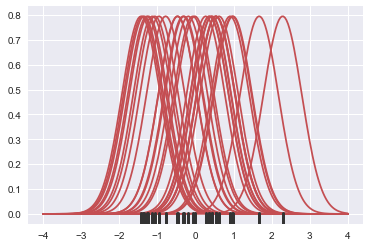

In [13]:
x = np.random.normal(0, 1, size=30)
bandwidth = 1.06 * x.std() * x.size ** (-1 / 5.)
support = np.linspace(-4, 4, 200)
kernels = []
for x_i in x:
    kernel = stats.norm(x_i, bandwidth).pdf(support)
    kernels.append(kernel)
    plt.plot(support, kernel, color="r")
sns.rugplot(x, color=".2", linewidth=3);

接下来，这些曲线可以用来计算支持网格中每个点的密度值。得到的曲线再用归一化使得它下面的面积等于1:

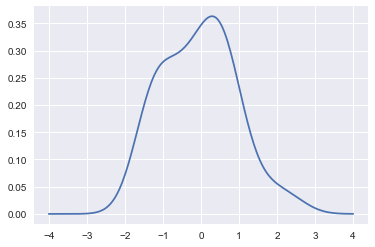

In [19]:
density = np.sum(kernels, axis=0)
density /= integrate.trapz(density, support)
plt.plot(support, density);

KDE的带宽bandwidth（bw）参数控制估计对数据的拟合程度，与直方图中的bin(数据切分数量参数)大小非常相似。 它对应于我们上面绘制的内核的宽度。 默认中会尝试使用通用引用规则猜测一个适合的值，但尝试更大或更小的值可能会有所帮助：

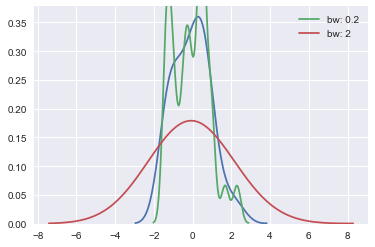

In [20]:
sns.kdeplot(x)
sns.kdeplot(x, bw=.2, label="bw: 0.2")
sns.kdeplot(x, bw=2, label="bw: 2")
plt.legend();

如上所述，高斯KDE过程的性质意味着估计延续了数据集中最大和最小的值。 可以通过cut参数来控制绘制曲线的极值值的距离; 然而，这只影响曲线的绘制方式，而不是曲线如何拟合：

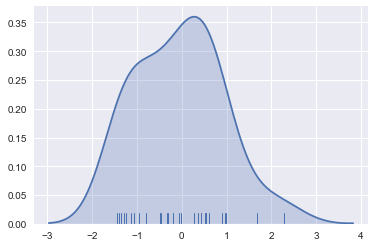

In [26]:
sns.kdeplot(x, shade=True, cut=3)   #cut值越大旁瓣越大
sns.rugplot(x);

## 拟合参数分布

还可以使用distplot()将参数分布拟合到数据集，并可视化地评估其与观察数据的对应关系：

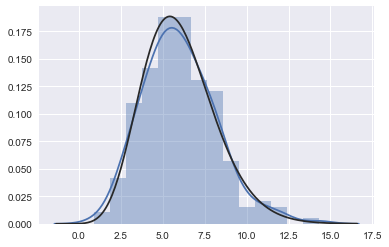

In [36]:
x = np.random.gamma(6, size=200)
sns.distplot(x, kde=True, fit=stats.gamma);
print(stats.gamma)

## 绘制双变量分布

在绘制两个变量的双变量分布也是有用的。在seaborn中这样做的最简单的方法就是在jointplot()函数中创建一个多面板数字，显示两个变量之间的双变量（或联合）关系以及每个变量的单变量（或边际）分布和轴。

joinplot(color)参数：
m 紫色
g 绿色
k 卡其

In [41]:
mean, cov = [0, 1], [(1, .5), (.5, 1)]
data = np.random.multivariate_normal(mean, cov, 200)
df = pd.DataFrame(data, columns=["x", "y"])

            x         y
0   -0.427130  1.675537
1    0.218807 -0.003273
2    0.778224 -0.048177
3    0.811741  1.040640
4   -0.638683 -0.389429
5    0.849412  1.368911
6   -0.146912 -0.106138
7    0.695732  0.037002
8   -0.386707 -0.542508
9    2.355781  4.452660
10   0.268681  2.350375
11   0.177435  1.852320
12   1.434922  0.173949
13  -0.351046  0.837863
14  -0.890572  1.147510
15  -0.409434  1.418400
16  -0.532920  1.936284
17   0.756803  1.102233
18  -1.263321 -0.885236
19   0.188130  2.057918
20   1.345536  1.158115
21   1.294485  1.461321
22  -0.068247  0.887662
23  -0.073805  2.436425
24  -1.047524 -0.126651
25  -1.139052 -0.790410
26   0.095000  0.374435
27   1.102044  1.104224
28   0.104814  1.068227
29   1.403059  0.926382
..        ...       ...
170 -0.650782  0.009912
171  0.138481  1.850852
172 -0.660582  1.155224
173 -0.655647  0.306008
174 -0.612098 -1.024372
175 -0.693489  1.702205
176 -0.464362  1.594111
177  0.533675  1.444689
178 -1.457455  0.863903
179 -0.536282  1

### 散点图

双变量分布的最熟悉的可视化方式无疑是散点图，其中每个观察结果以x和y值表示。这是两个方面的地毯图。可以使用matplotlib中的plt.scatter函数绘制散点图，它也是jointplot()函数显示的默认方式。

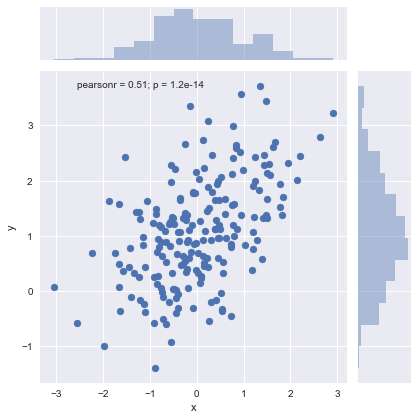

In [40]:
sns.jointplot(x="x", y="y", data=df);

### HexBin图

直方图的双变量类似物被称为“hexbin”图，因为它显示了落在六边形仓内的观测数。该图适用于较大的数据集。通过matplotlib plt.hexbin函数和jointplot()中的样式可以实现。 它最好使用白色背景：

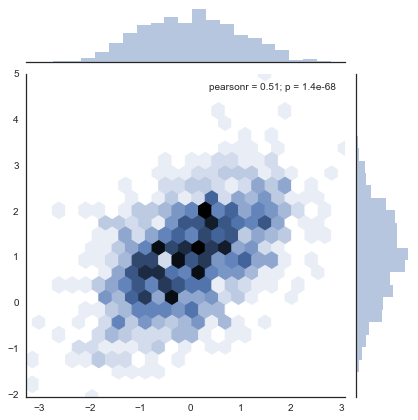

In [43]:
x, y = np.random.multivariate_normal(mean, cov, 1000).T
with sns.axes_style("white"):
    sns.jointplot(x=x, y=y, kind="hex", color="b");

### 核密度估计

使用上述内核密度估计程序可视化双变量分布也是可行的。在seaborn中，这种图用等高线图显示，可以在jointplot()中作为样式传入参数使用：

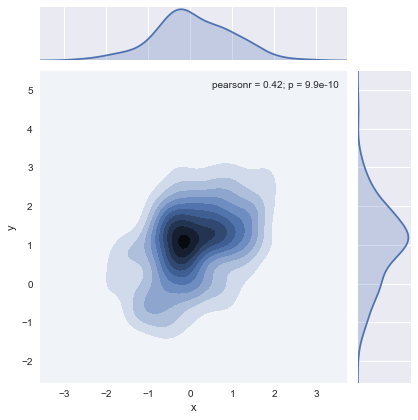

In [44]:
sns.jointplot(x="x", y="y", data=df, kind="kde");

还可以使用kdeplot()函数绘制二维核密度图。这样可以将这种绘图绘制到一个特定的（可能已经存在的）matplotlib轴上，而jointplot()函数只能管理自己：

Figure(432x432)
Axes(0.125,0.125;0.775x0.755)


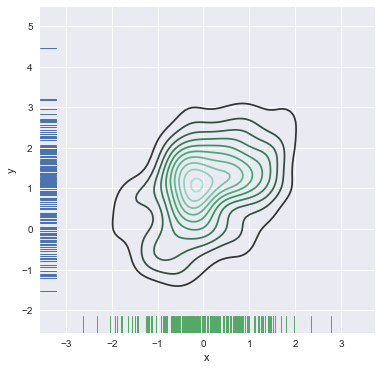

In [45]:
f, ax = plt.subplots(figsize=(6, 6))
sns.kdeplot(df.x, df.y, ax=ax)
sns.rugplot(df.x, color="g", ax=ax)
sns.rugplot(df.y, vertical=True, ax=ax);  #在垂直方向上绘毛毯图

如果是希望更连续地显示双变量密度，您可以简单地增加n_levels参数增加轮廓级数：

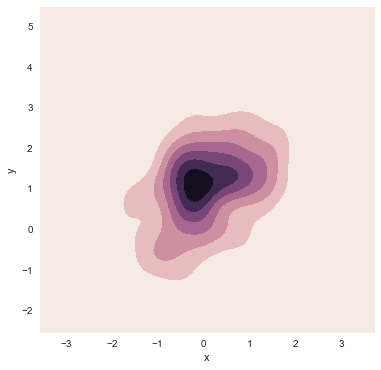

In [51]:
f, ax = plt.subplots(figsize=(6, 6))
cmap = sns.cubehelix_palette(as_cmap=True, dark=1, light=0, reverse=True)
sns.kdeplot(df.x, df.y, cmap=cmap, n_levels=6, shade=True);  #n_levels  数值越大渐变越缓

jointplot()函数使用JointGrid来管理。为了获得更多的灵活性，您可能需要直接使用JointGrid绘制图形。jointplot()在绘制后返回JointGrid对象，您可以使用它来添加更多图层或调整可视化的其他方面：

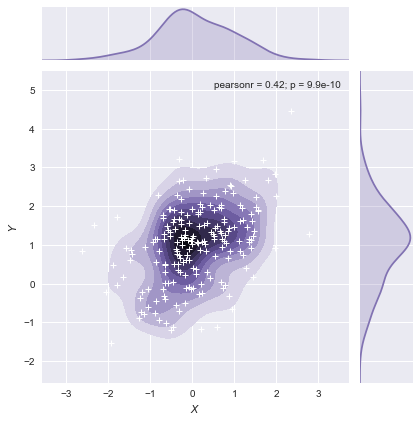

In [64]:
g = sns.jointplot(x="x", y="y", data=df, kind="kde", color="m")  #m为紫色
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+") #c=为设置标志的颜色 linewidth 标志的大小
g.ax_joint.collections[0].set_alpha(0)  #内部等高线背景加边框边线
g.set_axis_labels("$X$", "$Y$");

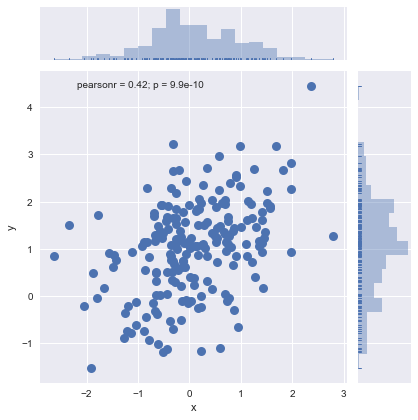

In [66]:
sns.jointplot(x='x',y='y',data=df,linewidth=2,marginal_kws=dict(bins=20, rug=True))

## 呈现数据集中成对的关系

要在数据集中绘制多个成对双变量分布，可以使用pairplot()函数。这将创建一个轴的矩阵，并显示DataFrame中每对列的关系。默认情况下，它也绘制每个变量在对角轴上的单变量：

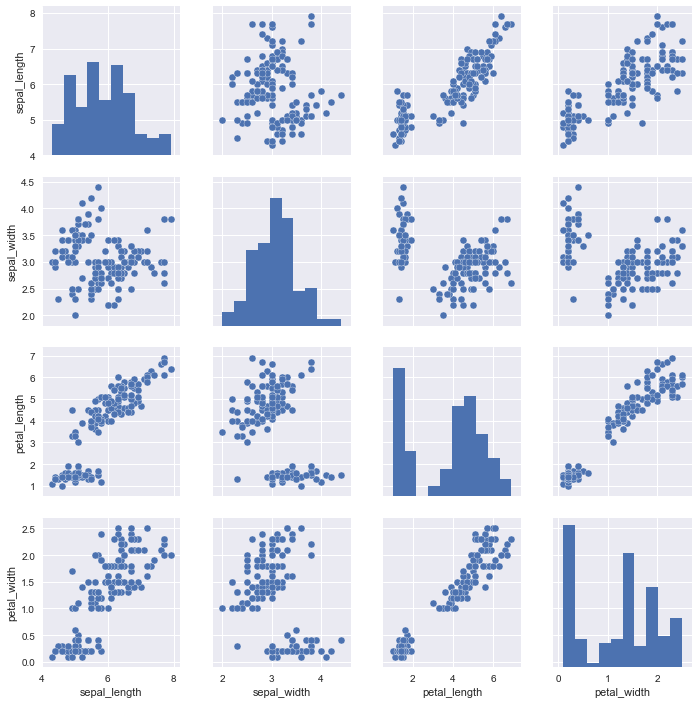

In [67]:
iris = sns.load_dataset("iris")
sns.pairplot(iris);

对于jointplot()和JointGrid之间的关系，pairplot()函数是建立在一个PairGrid对象上的，可以直接使用它来获得更大的灵活性：

In [ ]:
g = sns.PairGrid(iris)
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot, cmap="Blues_d", n_levels=6);